# KNN 분류

KNN은 K - Nearest - Neighbors의 약칭

<img width="850" alt="005-1" src="https://user-images.githubusercontent.com/63298243/125044286-c94fb780-e0d6-11eb-8e43-a609b3099c98.png">

새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 K개의 이웃을 먼저 찾음  

가까운 이웃들이 갖고 있는 목표 값과 같은 값으로 분류하여 예측
<br><br><br>
K의 값에 따라 예측의 정확도가 달라지므로 적절한 K값을 찾는 것이 매우 중요
<br><br><br>
새로운 관측 point에 대해 기존 데이터와의 점과 점 사이의 거리를 통해서 최근접 데이터를 찾을 수 있음

# Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = sns.load_dataset('iris')

# Load data

- sepal_length : 꽃받침 길이
- sepal_width : 꽃받침 너비
- petal_length : 꽃잎 길이
- petal_width	 : 꽃잎 너비
- species : 종

# EDA

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 데이터 자료형 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 데이터 결측치 확인

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 데이터 통계 요약정보 확인

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 상관관계 히트맵

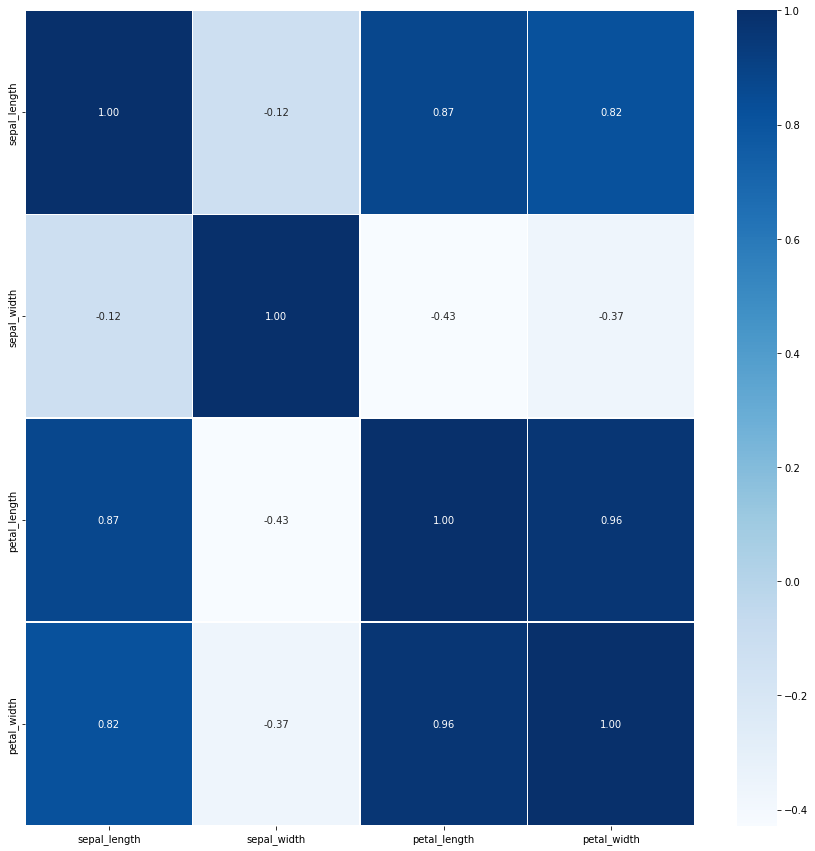

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Modeling

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### EX) 꽃잎 길이에 따른 꽃잎 종 분류

In [14]:
X = df[['petal_length']]
y = df['species']

In [15]:
X

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [16]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

#### 독립 변수 데이터를 정규화(normalization)

In [17]:
X = StandardScaler().fit(X).transform(X)

In [18]:
X

array([[-1.34022653],
       [-1.34022653],
       [-1.39706395],
       [-1.2833891 ],
       [-1.34022653],
       [-1.16971425],
       [-1.34022653],
       [-1.2833891 ],
       [-1.34022653],
       [-1.2833891 ],
       [-1.2833891 ],
       [-1.22655167],
       [-1.34022653],
       [-1.51073881],
       [-1.45390138],
       [-1.2833891 ],
       [-1.39706395],
       [-1.34022653],
       [-1.16971425],
       [-1.2833891 ],
       [-1.16971425],
       [-1.2833891 ],
       [-1.56757623],
       [-1.16971425],
       [-1.05603939],
       [-1.22655167],
       [-1.22655167],
       [-1.2833891 ],
       [-1.34022653],
       [-1.22655167],
       [-1.22655167],
       [-1.2833891 ],
       [-1.2833891 ],
       [-1.34022653],
       [-1.2833891 ],
       [-1.45390138],
       [-1.39706395],
       [-1.34022653],
       [-1.39706395],
       [-1.2833891 ],
       [-1.39706395],
       [-1.39706395],
       [-1.39706395],
       [-1.22655167],
       [-1.05603939],
       [-1

#### train data 와 test data로 구분

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=20) 

In [20]:
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (105, 1)
test data 개수:  (45, 1)


#### 모델 객체 생성 (k=5로 설정)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

#### train data를 가지고 모델 학습

In [22]:
knn.fit(X_train, y_train)   

KNeighborsClassifier()

#### test data를 가지고 y_hat을 예측 (분류) 

In [23]:
y_hat = knn.predict(X_test)

In [24]:
print(y_hat[0:10])
print(y_test.values[0:10])

['setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa']
['setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa']


### 모델 성능 평가

confusion matrix & classification report

In [25]:
r_square = knn.score(X_test, y_test)
print(r_square)

0.9555555555555556
